<a href="https://colab.research.google.com/github/Aught1/266_Spring_final_recipe_rating_prediction_code/blob/main/RecipePrediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
# https://www.marqo.ai/course/training-fine-tuning-sentence-transformers
#!pip install transformers[torch] accelerate -U
!pip install -U sentence_transformers
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.6/340.6 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:

!pip install -U tensorflow[and-cuda]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.3/363.3 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 895.7/895.7 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.2/577.2 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.3/130.3 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.6/217.6 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.

In [1]:
#import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

from sentence_transformers import SentenceTransformer, util

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#################################################################################
# If you already cleaned the data then run this and skip the rest of this section
a = pd.read_csv("/content/drive/MyDrive/kaggle_recipe_data/cleaned_recipes.csv").drop("Unnamed: 0", axis=1)
################################################################################
a.columns

Index(['RecipeId', 'Name', 'TotalTime', 'Description', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeInstructions'],
      dtype='object')

In [5]:
def result_hist(y_test, predictions, title="", more=False):

  plt.hist(y_test, bins=[0.75,1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75,5.25], label = "Actual")
  plt.hist(predictions, bins=[0.75,1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75,5.25], alpha=0.5, label="Predicted")
  plt.xlabel("Rating")
  plt.ylabel("Count")
  plt.title(title)
  plt.legend()
  plt.show()

  if more:
    fig, axs = plt.subplots(3, 3, figsize=(12, 12))
    for i in range(9):
      Rating = i*0.5+1
      mse = mean_squared_error(y_test[y_test==Rating], predictions[y_test==Rating])
      print(Rating, mse)

      ax = axs[i//3, i%3]
      ax.hist(predictions[y_test==Rating], label=str(Rating), bins=[0.75,1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75,5.25])  # Example: vary sine wave
      ax.set_title(f"{Rating} Predictions (MSE:{mse:.3f})")
      ax.set_xlabel("Rating")
      ax.set_ylabel("Count")

      #print(pred)
      print()
    fig.tight_layout()

In [3]:
# Select 150 random samples from each Rating category

def train_set(a, replace=False):
  train = pd.DataFrame()
  val = pd.DataFrame()
  test = pd.DataFrame()
  # Will leave 1.5 in despite not having as much data for now (so training and test sets will contain same data for 1.5 rating)
  for i in [1,1.5,2,2.5, 3. , 3.5, 4. , 4.5, 5]:
    slicer = a[a.AggregatedRating == i]

    lim = 2500

    if (len(slicer) < lim):
      if replace:
        sliced = slicer.sample(frac=0.8)
        # Create many samples from 80% of data
        temp = sliced.sample(int(lim*0.8), replace=True).reset_index(drop=True)

        train = pd.concat([train, temp], ignore_index=True)
        """
        if (len(slicer) > lim*0.1):
          val = pd.concat([val, slicer.sample(int(lim*0.1), replace=True).reset_index(drop=True)], ignore_index=True)
          test = pd.concat([test, slicer.sample(int(lim*0.1), replace=True).reset_index(drop=True)], ignore_index=True)
          continue
        """
        temp = slicer.drop(sliced.index)
        print(i, temp.index)
        valid = temp.sample(frac=0.5)
        val = pd.concat([val, valid], ignore_index=True)
        test = pd.concat([test, temp.drop(valid.index)], ignore_index=True)
        continue

      print(i)
      temp = slicer.sample(len(slicer)).reset_index(drop=True)
    else:
      temp = slicer.sample(lim).reset_index(drop=True)

    test_temp = temp.sample(frac=0.1)
    test = pd.concat([test, test_temp], ignore_index=True)

    temp = temp.drop(test_temp.index)
    val_temp = temp.sample(frac=1/9)
    val = pd.concat([val, val_temp], ignore_index=True)

    train = pd.concat([train, temp.drop(val_temp.index)], ignore_index=True)
  return train, val, test

train, val, test = train_set(a, True)

display(train.groupby("AggregatedRating").count().Name)
display(val.groupby("AggregatedRating").count().Name)
display(test.groupby("AggregatedRating").count().Name)

1 Index([  1582,   4449,  11715,  13530,  18293,  27439,  37388,  39328,  39761,
        40227,  44385,  44991,  70070,  72381,  74831,  90084,  90153,  91309,
        94327,  94865,  95056,  97854,  98486,  99361, 103324, 103341, 107993,
       116145, 120129, 123282, 125856, 129910, 137156, 137740, 139608, 143244,
       147239, 149885, 152138, 159196, 159203, 162866, 164205, 167082, 167325],
      dtype='int64')
1.5 Index([  8660,   9663,  30160,  73479,  74370,  76030,  77262,  78452,  92887,
       111115, 126071, 127824, 131813, 158279, 161931],
      dtype='int64')
2 Index([   214,   1005,   4135,   4676,   7622,   8194,  11320,  15275,  17484,
        17946,  19250,  20680,  24087,  28189,  31156,  32496,  36950,  37171,
        47526,  50815,  52785,  63419,  63630,  73437,  74229,  74308,  74694,
        77219,  78396,  86041,  86527,  87997,  89167,  90606,  92210,  95075,
        95675, 100684, 102210, 103348, 107022, 108877, 111378, 112891, 118556,
       119950, 120730, 1

,Name
AggregatedRating,
1.0,2000
1.5,2000
2.0,2000
2.5,2000
3.0,2000
3.5,2000
4.0,2000
4.5,2000
5.0,2000


,Name
AggregatedRating,
1.0,22
1.5,8
2.0,33
2.5,68
3.0,250
3.5,250
4.0,250
4.5,250
5.0,250


,Name
AggregatedRating,
1.0,23
1.5,7
2.0,33
2.5,67
3.0,250
3.5,250
4.0,250
4.5,250
5.0,250


In [5]:
from sklearn.preprocessing import StandardScaler

# Fit only on training data
scaler = StandardScaler()

#Numerical factors
factors = ['TotalTime', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']

X_train = scaler.fit_transform(train[factors].to_numpy())
y_train = train.AggregatedRating.to_numpy()

X_val = scaler.transform(val[factors].to_numpy())
y_val = val.AggregatedRating.to_numpy()

X_test = scaler.transform(test[factors].to_numpy())
y_test = test.AggregatedRating.to_numpy()
print(X_train.shape, X_val.shape, X_test.shape)

(18000, 10) (1381, 10) (1380, 10)


In [7]:
# For sentence encodings
#sBERT = SentenceTransformer('all-MiniLM-L6-v2')
sBERT = SentenceTransformer("/content/drive/MyDrive/SBertRecipe3-5")

x_train = train.RecipeInstructions.to_numpy()
y_train = train.AggregatedRating.to_numpy()

x_val = val.RecipeInstructions.to_numpy()
y_val = val.AggregatedRating.to_numpy()

x_test = test.RecipeInstructions.to_numpy()
y_test = test.AggregatedRating.to_numpy()

# Encoding
X_val = sBERT.encode(x_val)
X_test = sBERT.encode(x_test)
X_train = sBERT.encode(x_train)

In [66]:

from sklearn.preprocessing import StandardScaler# number + SBERT
scaler = StandardScaler()
factors = ['TotalTime', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']

X_train = np.hstack((scaler.fit_transform(train[factors].to_numpy()), X_train))
X_val = np.hstack((scaler.transform(val[factors].to_numpy()), X_val))
X_test = np.hstack((scaler.transform(test[factors].to_numpy()), X_test))

print(X_train.shape, X_val.shape, X_test.shape)

(18000, 394) (1381, 394) (1380, 394)


In [54]:
X_train = X_train[..., 10:]
X_val = X_val[..., 10:]
X_test = X_test[..., 10:]

In [12]:
# "Trained SBERT+Metadata"
title = "Trained SBERT"

In [77]:
train.to_csv("SBERTtrain.csv", index=False)
val.to_csv("SBERTval.csv", index=False)
test.to_csv("SBERTtest.csv", index=False)

In [4]:
pd.read_csv('SBERTtrain.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'SBERTtrain.csv.csv'

In [36]:
a.AggregatedRating.mean()

np.float64(4.710446879716517)

---
# Ordinal

In [50]:
!pip install mord

  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9885 sha256=76c90a3f9e3f32a6ee03c17477440b55910faa830c6b949bb23787eab0fc0694
  Stored in directory: /root/.cache/pip/wheels/d1/fc/57/f2a2ad4ed0491ab6d5bb8642a90f1da9469397641e914743da
Successfully built mord


In [53]:
import mord
model = mord.LogisticIT()
model.fit(X_train, (y_train*2-1).astype(int))

# Predictions
y_pred = model.predict(X_test)

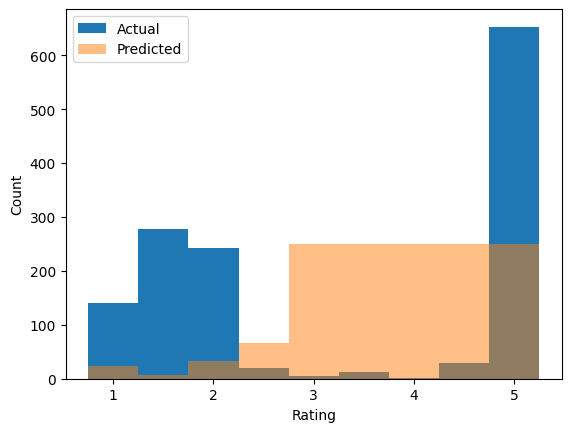

In [65]:
result_hist((y_pred+1)/2, y_test)

In [64]:
mean_squared_error(y_test, (y_pred+1)/2)

3.6945652173913044

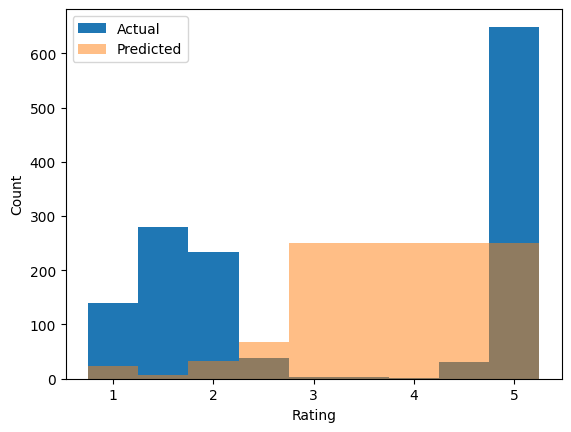

3.7081521739130436

In [67]:
model = mord.LogisticIT()
model.fit(X_train, (y_train*2-1).astype(int))

# Predictions
y_pred = model.predict(X_test)
result_hist((y_pred+1)/2, y_test)

mean_squared_error(y_test, (y_pred+1)/2)

In [70]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score((y_test*2-1).astype(int), y_pred))

Accuracy: 0.11304347826086956


In [54]:
print(mean_squared_error(y_test,[y_test.mean()]*len(y_test)))
print(mean_squared_error(y_val,[y_val.mean()]*len(y_val)))

mean_squared_error([y_train.mean()]*len(y_train), y_train)

0.8058816425120772
0.804694517138301


1.6666666666666667

In [7]:
y_test.mean()

np.float64(3.816666666666667)

In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [10]:
encoder = OrdinalEncoder(categories=[[1,1.5,2,2.5,3,3.5,4,4.5,5]])
a['encoded'] = encoder.fit_transform(a[['AggregatedRating']])
a[["AggregatedRating","encoded"]]

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0}

---
# Ridge Regression

In [11]:
from sklearn.linear_model import Ridge

# Train regression model (Ridge is simple + works well)
regressor = Ridge(alpha=1.0)
regressor.fit(X_train, y_train)

print(f"Training Loss (MSE): {mean_squared_error(y_train, regressor.predict(X_train))}")
print(f"Validation Loss (MSE): {mean_squared_error(y_val, regressor.predict(X_val))}")

predictions = regressor.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, predictions))

result_hist(y_test, predictions, title+": Ridge Regression Prediction Results", more=True)

Training Loss (MSE): 1.1260937366843782
Validation Loss (MSE): 1.249420273670269
Test MSE: 1.2272784710771736


NameError: name 'title' is not defined

---
# Linear Regression

Training Loss (MSE): 1.1237773905843493
Validation Loss (MSE): 1.2653258253822905
Test MSE: 1.240015927341651


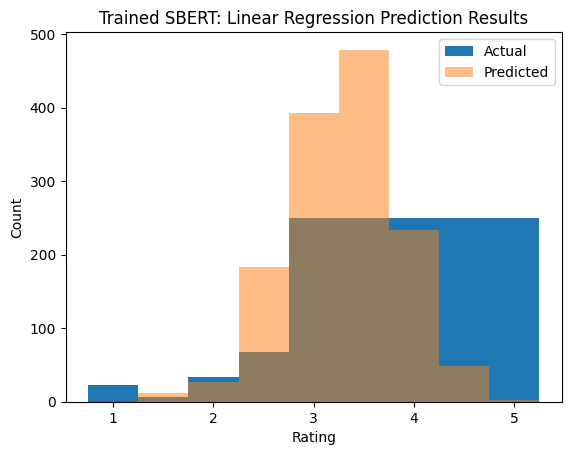

In [30]:
# LogisticRegression is for probability for a class, linear predicts a continuous variable.
from sklearn.linear_model import LinearRegression

model = LinearRegression()
result = model.fit(X_train, y_train)

print(f"Training Loss (MSE): {mean_squared_error(y_train, result.predict(X_train))}")
print(f"Validation Loss (MSE): {mean_squared_error(y_val, result.predict(X_val))}")

predictions = result.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, predictions))

result_hist(y_test, predictions, title+": Linear Regression Prediction Results")

In [25]:
y_train*2-2

array([0., 0., 0., ..., 8., 8., 8.])

In [ ]:
coefficients = model.coef_
intercept = model.intercept_

print('Coefficients:', coefficients)
print('Intercept:', intercept)

Coefficients: [-6.29961176e-06  4.82006974e-04 -4.92573568e-03  8.67786904e-04
 -3.28389131e-04 -5.63283997e-06 -2.94809594e-03  5.77982761e-03
  1.02723686e-03  3.10300018e-03]
Intercept: 2.965505824256652


---
# Random Forest

In [95]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=200, verbose=1, n_jobs=2)
forest = forest.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  5.8min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 24.7min
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed: 25.1min finished


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s


Training Loss (MSE): 0.04507251979166666
Validation Loss (MSE): 0.7917132422157858


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished


Test MSE: 0.8072031793478259


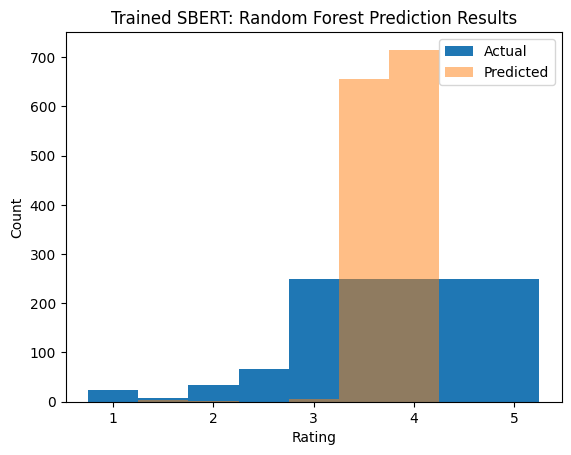

1.0 7.350482608695652

1.5 1.532857142857143

2.0 3.143743181818182

2.5 1.5814353544776119

3.0 0.5558000749999998

3.5 0.07134225000000001

4.0 0.09020095

4.5 0.587896075

5.0 1.5925590250000001



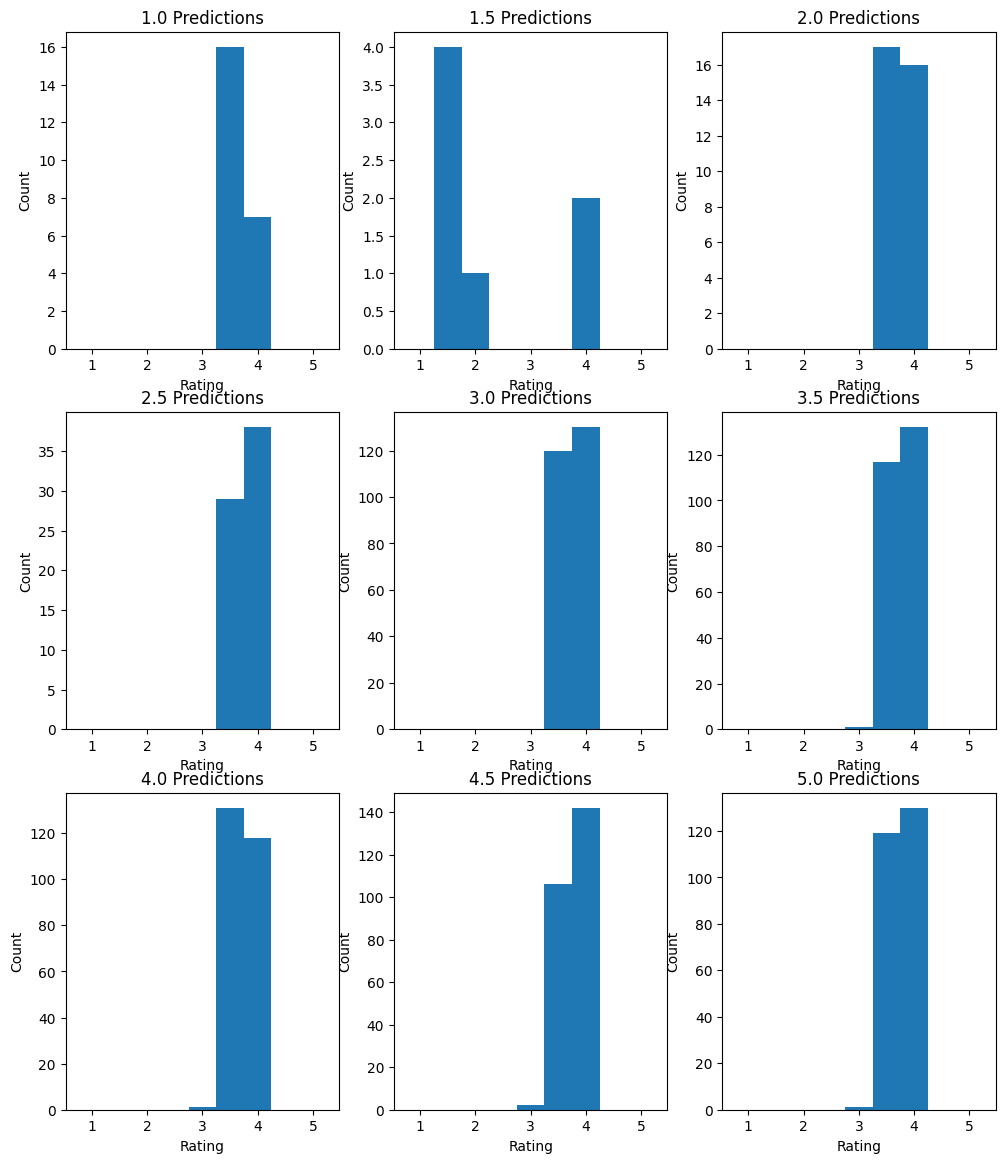

In [102]:
print(f"Training Loss (MSE): {mean_squared_error(y_train, forest.predict(X_train))}")
print(f"Validation Loss (MSE): {mean_squared_error(y_val, forest.predict(X_val))}")

predictions = forest.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, predictions))

result_hist(y_test, predictions, title+": Random Forest Prediction Results", more=True)

In [ ]:
for i in range(9):
  print(i*0.5+1, mean_squared_error(y_test[y_test==i*0.5 + 1], model.predict(X_test).reshape(1380)[y_test==i*0.5 + 1]))
  print()

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s


1.0 7.21811983695652



[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s


1.5 0.14595089285714286



[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s


2.0 2.9486049242424244



[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s


2.5 1.456931809701493



[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s


3.0 0.542349475



[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s


3.5 0.068832



[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s


4.0 0.0864408



[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s


4.5 0.601411525

5.0 1.603415975



[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.3s finished


---
# Neural Net (SBERT)

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, Concatenate
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Model
#from tensorflow.keras.layers import Lambda

In [10]:
def plot_hist(history, ylim = None, log=False, label=""):
  x = range(1, len(history.history["loss"]) + 1)
  plt.plot(x, history.history['loss'], label="Training")
  plt.plot(x, history.history['val_loss'], label="Validation")
  if ylim != None:
    plt.ylim(ylim)
  plt.xlabel("Epochs")
  plt.ylabel("MSE")
  if log:
    plt.yscale('log')
  plt.legend()
  plt.title(label + "Neural Net MSE Over Time")
  plt.show()

In [18]:
# model for SBERT encodings
model = Sequential([
    #Dense(384, activation='relu', input_shape=(384,)),
    #Dense(512, activation='relu'),
    #Dropout(0.5),
    Input(shape=(384,)),
    #Dense(256, activation='relu'),
    #Dropout(0.5),
    Dense(128, activation='relu', name='Dense (1)'),
    Dropout(0.5, name='Dropout 50%'),
    Dense(64, activation='relu', name='Dense (2)'),
    Dropout(0.4, name='Dropout 40% (1)'),
    #Dense(32, activation='relu'),
    #Dropout(0.4, name='Dropout_50%'),
    Dense(16, activation='relu', name='Dense (3)'),
    Dropout(0.4, name='Dropout 40% (2)'),
    Dense(1, name="Output")  # Output layer for regression
])
optimizer = Adam(learning_rate=0.00003)
# , metrics=['mse'] same thing as loss
model.compile(optimizer=optimizer, loss='mse')
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense (1) (Dense)               │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout 50% (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense (2) (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout 40% (1) (Dropout)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense (3) (Dense)               │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout 40% (2) (Dropout)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,593 (228.88 KB)

 Trainable params: 58,593 (228.88 KB)

 Non-trainable params: 0 (0.00 B)

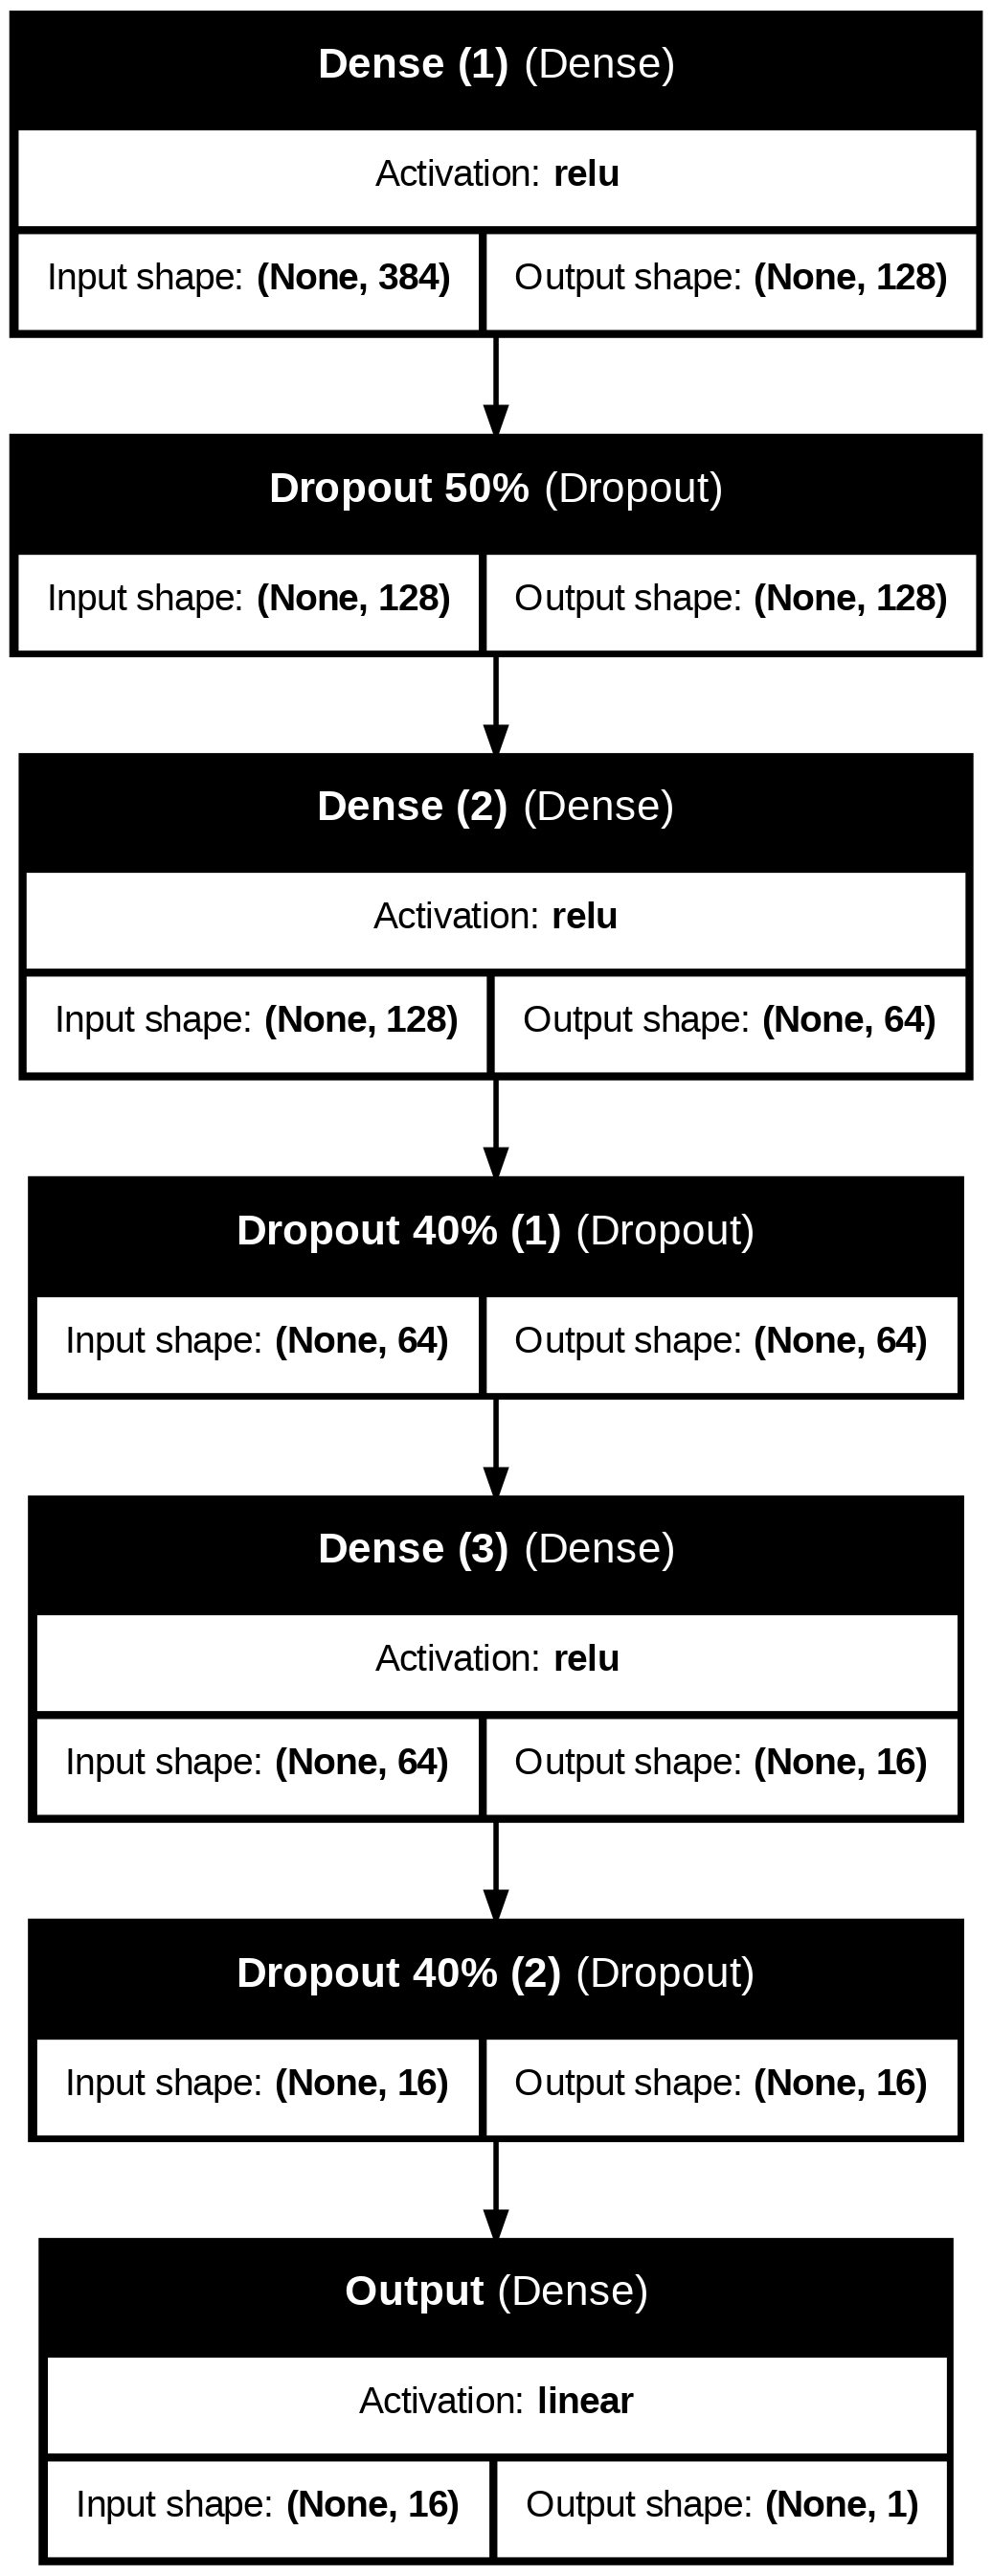

In [19]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [39]:
history2 = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=300, verbose=2)

Epoch 1/300
563/563 - 3s - 6ms/step - loss: 9.7924 - val_loss: 12.5141
Epoch 2/300
563/563 - 2s - 4ms/step - loss: 6.4391 - val_loss: 5.7937
Epoch 3/300
563/563 - 1s - 3ms/step - loss: 3.1305 - val_loss: 2.1822
Epoch 4/300
563/563 - 1s - 3ms/step - loss: 2.6666 - val_loss: 1.8796
Epoch 5/300
563/563 - 3s - 6ms/step - loss: 2.4970 - val_loss: 1.8849
Epoch 6/300
563/563 - 1s - 3ms/step - loss: 2.4794 - val_loss: 1.7615
Epoch 7/300
563/563 - 3s - 5ms/step - loss: 2.3712 - val_loss: 1.7443
Epoch 8/300
563/563 - 2s - 4ms/step - loss: 2.3780 - val_loss: 1.7733
Epoch 9/300
563/563 - 1s - 3ms/step - loss: 2.2697 - val_loss: 1.7027
Epoch 10/300
563/563 - 1s - 3ms/step - loss: 2.2323 - val_loss: 1.6842
Epoch 11/300
563/563 - 2s - 4ms/step - loss: 2.1824 - val_loss: 1.6370
Epoch 12/300
563/563 - 2s - 4ms/step - loss: 2.1853 - val_loss: 1.6063
Epoch 13/300
563/563 - 2s - 3ms/step - loss: 2.1549 - val_loss: 1.6972
Epoch 14/300
563/563 - 2s - 4ms/step - loss: 2.1166 - val_loss: 1.6388
Epoch 15/300
5

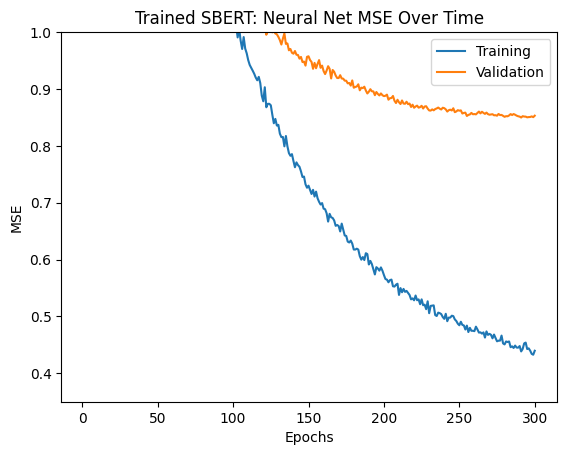

'\nplt.plot(history.history["loss"] + history2.history["loss"], label="Training")\nplt.plot(history.history["val_loss"] + history2.history["val_loss"], label="Validation")\nplt.xlabel("Epochs")\nplt.ylabel("MSE")\nplt.ylim([0.5, 1.2])\nplt.title("SBERT: Neural Net MSE Over Time")\n'

In [42]:

plot_hist(history2, ylim=[0.35, 1],label=title+": ")
"""
plt.plot(history.history["loss"] + history2.history["loss"], label="Training")
plt.plot(history.history["val_loss"] + history2.history["val_loss"], label="Validation")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.ylim([0.5, 1.2])
plt.title("SBERT: Neural Net MSE Over Time")
"""

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test MSE: 0.8364380505484962


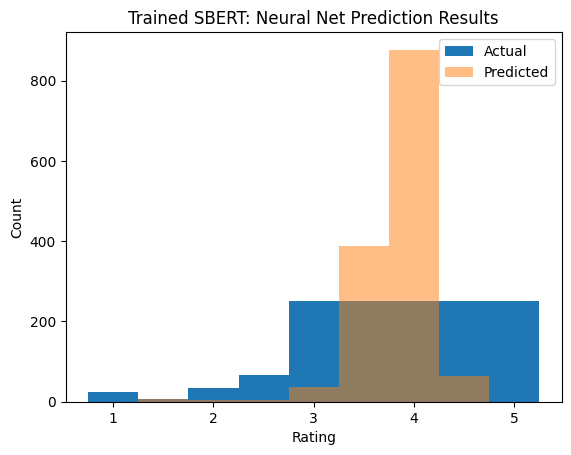

In [17]:
predictions = model.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, predictions))

result_hist(y_test, predictions, title="Trained SBERT: Neural Net Prediction Results")

In [ ]:
for i in range(9):
  print(i*0.5+1, mean_squared_error(y_test[y_test==i*0.5 + 1], model.predict(X_test).reshape(2051)[y_test==i*0.5 + 1]))
  print()

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1.0 0.24061513817361377

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1.5 0.04486004553452959

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
2.0 0.14928598506881882

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
2.5 0.6673068015977023

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
3.0 0.5817631719400006

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
3.5 0.08994041896081353

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4.0 0.1842665578403594

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4.5 0.691711695134981

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
5.0 1.7379246775025898



---

# Neural Net for normal data

In [16]:
# model for SBERT encodings

#from tensorflow.keras.activations import swish

model = Sequential([
    #Dense(384, activation='relu', input_shape=(384,)),
    #Dense(256, activation='relu'),
    #Dropout(0.5),
    Input(shape=(10,)),
    Dense(16, activation='relu', name="Dense (1)"),
    Dense(16, activation='relu', name="Dense (2)"),
    Dropout(0.1, name = "Dropout 10% (1)"),
    Dense(16, activation='relu', name="Dense (3)"),
    Dropout(0.1, name= "Dropout 10% (2)"),
    Dense(1, name="Output")  # Output layer for regression
])
optimizer = Adam(learning_rate=0.00005)
# , metrics=['mse'] same thing as loss
model.compile(optimizer=optimizer, loss='mse')
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense (1) (Dense)               │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense (2) (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout 10% (1) (Dropout)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense (3) (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout 10% (2) (Dropout)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 737 (2.88 KB)

 Trainable params: 737 (2.88 KB)

 Non-trainable params: 0 (0.00 B)

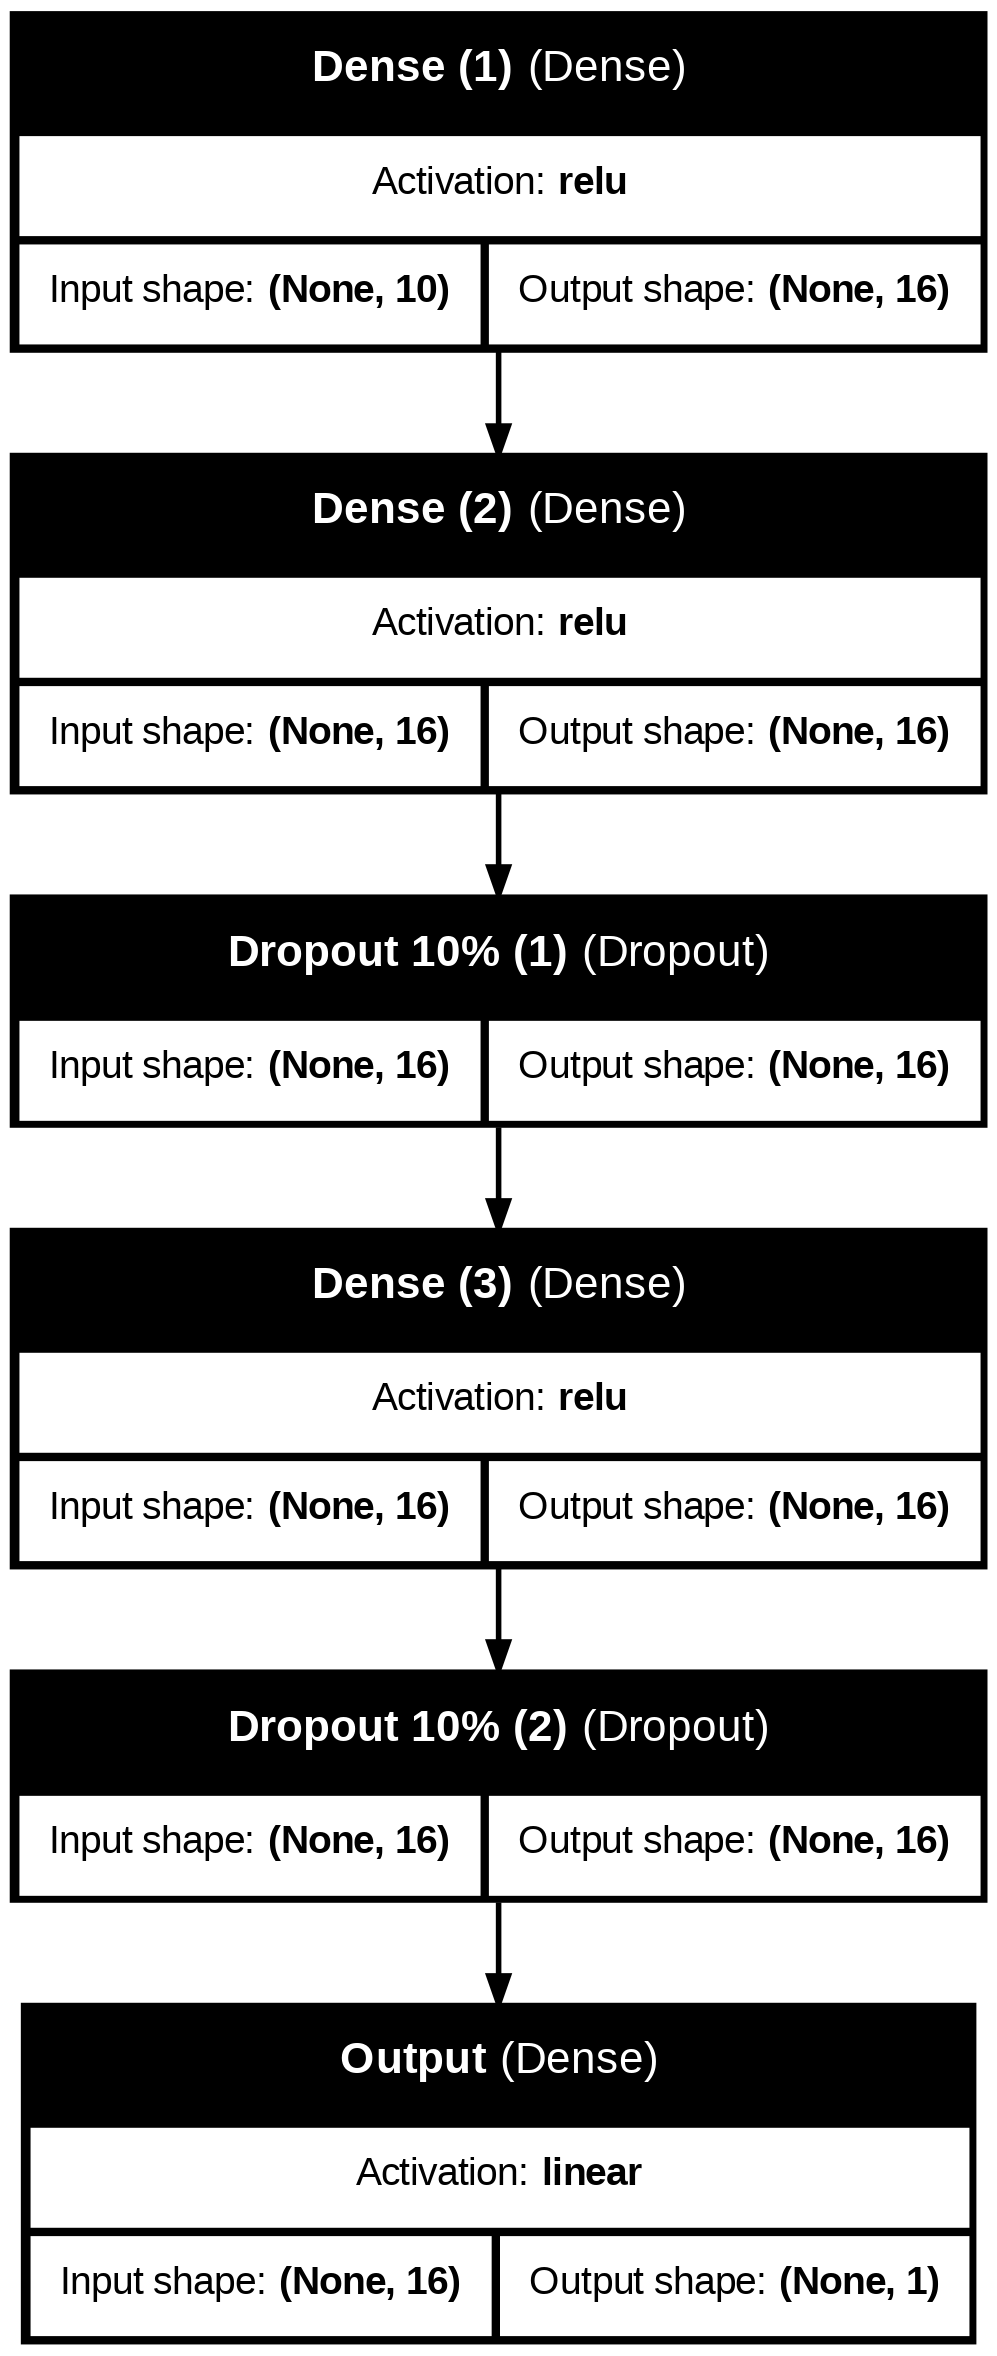

In [17]:
plot_model(model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.6180 - val_loss: 1.4457
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.6068 - val_loss: 1.4403
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6169 - val_loss: 1.4458
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.6120 - val_loss: 1.4563
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6042 - val_loss: 1.4233
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6100 - val_loss: 1.4318
Epoch 7/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6242 - val_loss: 1.4101
Epoch 8/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5988 - val_loss: 1.4466
Epoch 9/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.6320 - val_loss: 1.4316
Epoch 10/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5891 - val_loss: 1.4365
Epoch 11/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6206 - val_loss: 1.4294
Epoch 12/100
563/563 ━━━━━━━━━━━━━━━━━━━━

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test MSE: 1.4162671560057483


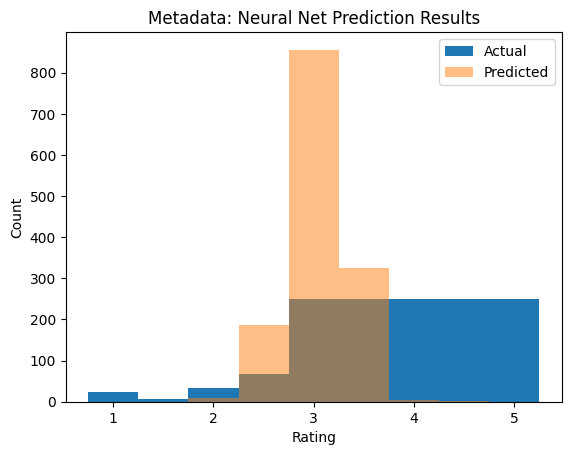

In [ ]:
predictions = model.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, predictions))

result_hist(y_test, predictions, title="Metadata: Neural Net Prediction Results")

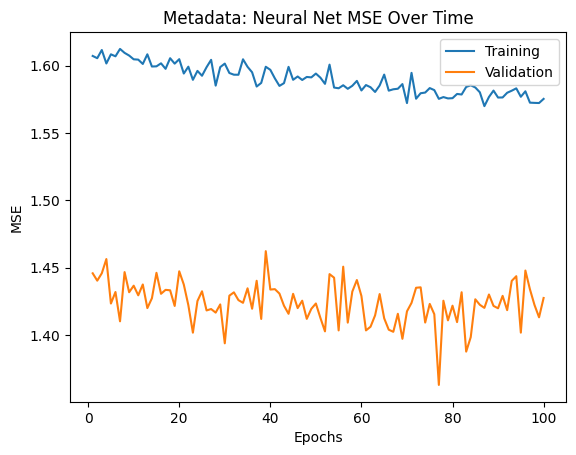

In [ ]:
plot_hist(history, label="Metadata: ")

---
# Both

In [22]:


# model for SBERT encodings
# Step 1: Separate Inputs
recipe_input = Input(shape=(384,), name='recipe_input')
nutrition_input = Input(shape=(10,), name='nutrition_input')

# Step 2: Separate Dense Layers
x1 = Dense(128, activation='relu', name="Dense (1a)")(recipe_input)
x1 = Dropout(0.5, name = "Dropout 50% (1)")(x1)
x1 = Dense(64, activation='relu', name="Dense (2a)")(x1)
x1 = Dropout(0.5, name = "Dropout 50% (2)")(x1)

x2 = Dense(16, activation='relu', name="Dense (1b)")(nutrition_input)
x2 = Dropout(0.2, name = "Dropout 20% (1)")(x2)
#x2 = Dense(16, activation='relu')(x2)
#x2 = Dropout(0.5)(x2)

# Step 3: Concatenate
combined = Concatenate()([x1, x2])

# Step 4: Combined Dense Layers
#x = Dense(64, activation='relu')(combined)
#x = Dropout(0.2)(x)
x = Dense(32, activation='relu', name="Dense (1c)")(combined)
x = Dropout(0.2, name = "Dropout 20% (2)")(x)
x = Dense(16, activation='relu', name="Dense (2c)")(combined)
x = Dropout(0.2, name = "Dropout 20% (3)")(x)
x = Dense(8, activation='relu', name="Dense (3c)")(x)

# Step 5: Output Layer (Regression)
output = Dense(1, activation='linear', name="Output")(x)  # Use 'softmax' with 5 units for classification
#output = Dense(1, activation='sigmoid')(x)      # Output in (0, 1)
#scaled_output = Lambda(lambda y: y * 4 + 1)(output)

# Build and compile the model
model = Model(inputs=[recipe_input, nutrition_input], outputs=output)

optimizer = Adam(learning_rate=0.00003)
# , metrics=['mse'] same thing as loss
model.compile(optimizer=optimizer, loss='mse')
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ recipe_input        │ (None, 384)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense (1a) (Dense)  │ (None, 128)       │     49,280 │ recipe_input[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dropout 50% (1)     │ (None, 128)       │          0 │ Dense (1a)[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ nutrition_input     │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense (2a) (Dense)  │ (None, 64)        │      8,256 │ Dropout 50%       │
│                     │                   │            │ (1)[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense (1b) (Dense)  │ (None, 16)        │        176 │ nutrition_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dropout 50% (2)     │ (None, 64)        │          0 │ Dense (2a)[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dropout 20% (1)     │ (None, 16)        │          0 │ Dense (1b)[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 80)        │          0 │ Dropout 50%       │
│ (Concatenate)       │                   │            │ (2)[0][0],        │
│                     │                   │            │ Dropout 20%       │
│                     │                   │            │ (1)[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense (2c) (Dense)  │ (None, 16)        │      1,296 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dropout 20% (3)     │ (None, 16)        │          0 │ Dense (2c)[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense (3c) (Dense)  │ (None, 8)         │        136 │ Dropout 20%       │
│                     │                   │            │ (3)[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output (Dense)      │ (None, 1)         │          9 │ Dense (3c)[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 59,153 (231.07 KB)

 Trainable params: 59,153 (231.07 KB)

 Non-trainable params: 0 (0.00 B)

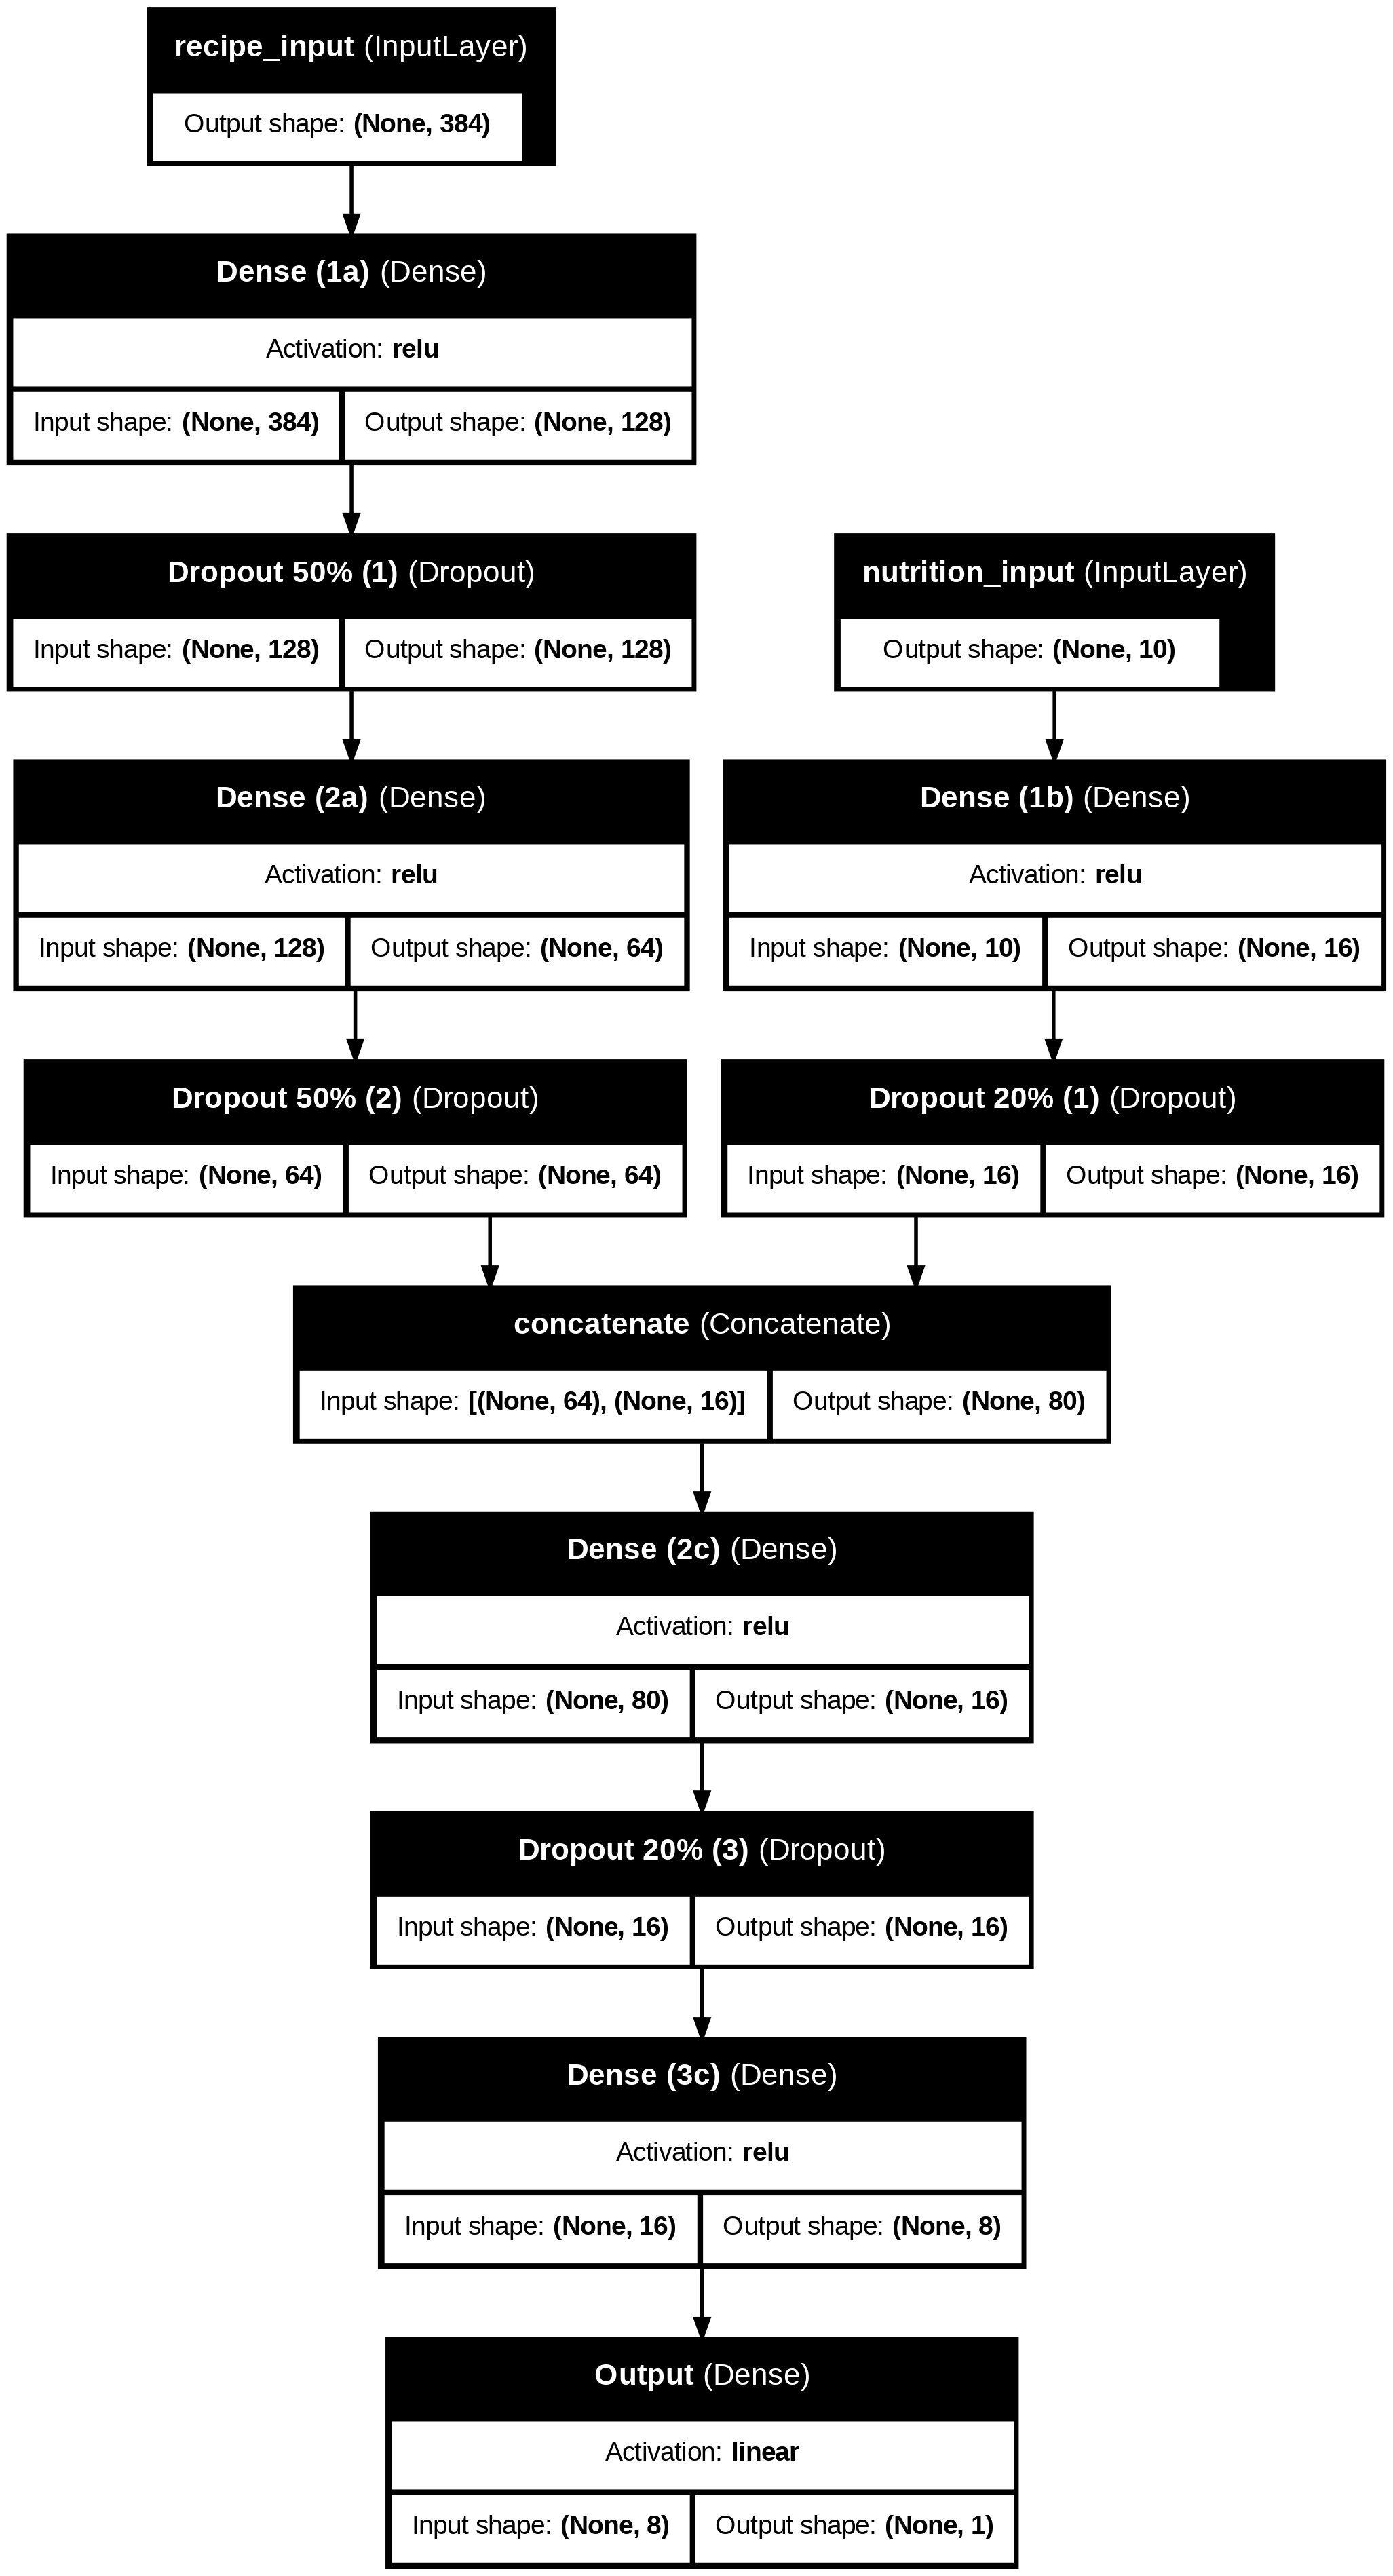

In [23]:
plot_model(model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [110]:
history = model.fit([X_train[..., 10:], X_train[..., :10]], y_train, validation_data=([X_val[..., 10:], X_val[..., :10]], y_val), epochs=200, verbose=2)

Epoch 1/200
563/563 - 5s - 8ms/step - loss: 10.4371 - val_loss: 12.7824
Epoch 2/200
563/563 - 2s - 4ms/step - loss: 6.8980 - val_loss: 5.8737
Epoch 3/200
563/563 - 3s - 5ms/step - loss: 3.1107 - val_loss: 1.9321
Epoch 4/200
563/563 - 3s - 5ms/step - loss: 2.4903 - val_loss: 1.7333
Epoch 5/200
563/563 - 3s - 5ms/step - loss: 2.3650 - val_loss: 1.6881
Epoch 6/200
563/563 - 2s - 3ms/step - loss: 2.2981 - val_loss: 1.6647
Epoch 7/200
563/563 - 3s - 5ms/step - loss: 2.2011 - val_loss: 1.6281
Epoch 8/200
563/563 - 2s - 3ms/step - loss: 2.1423 - val_loss: 1.6734
Epoch 9/200
563/563 - 2s - 3ms/step - loss: 2.1218 - val_loss: 1.5914
Epoch 10/200
563/563 - 3s - 5ms/step - loss: 2.0319 - val_loss: 1.5861
Epoch 11/200
563/563 - 2s - 4ms/step - loss: 1.9637 - val_loss: 1.5444
Epoch 12/200
563/563 - 2s - 3ms/step - loss: 1.9320 - val_loss: 1.5162
Epoch 13/200
563/563 - 3s - 5ms/step - loss: 1.8909 - val_loss: 1.5312
Epoch 14/200
563/563 - 2s - 4ms/step - loss: 1.8232 - val_loss: 1.4616
Epoch 15/200


In [121]:
history2 = model.fit([X_train[..., 10:], X_train[..., :10]], y_train, validation_data=([X_val[..., 10:], X_val[..., :10]], y_val), epochs=100, verbose=2)

Epoch 1/100
563/563 - 3s - 5ms/step - loss: 0.3610 - val_loss: 0.8453
Epoch 2/100
563/563 - 4s - 7ms/step - loss: 0.3652 - val_loss: 0.8465
Epoch 3/100
563/563 - 2s - 3ms/step - loss: 0.3609 - val_loss: 0.8499
Epoch 4/100
563/563 - 3s - 5ms/step - loss: 0.3725 - val_loss: 0.8509
Epoch 5/100
563/563 - 3s - 6ms/step - loss: 0.3651 - val_loss: 0.8482
Epoch 6/100
563/563 - 3s - 5ms/step - loss: 0.3614 - val_loss: 0.8502
Epoch 7/100
563/563 - 2s - 3ms/step - loss: 0.3556 - val_loss: 0.8550
Epoch 8/100
563/563 - 2s - 3ms/step - loss: 0.3579 - val_loss: 0.8488
Epoch 9/100
563/563 - 3s - 4ms/step - loss: 0.3495 - val_loss: 0.8479
Epoch 10/100
563/563 - 2s - 3ms/step - loss: 0.3564 - val_loss: 0.8490
Epoch 11/100
563/563 - 3s - 5ms/step - loss: 0.3530 - val_loss: 0.8406
Epoch 12/100
563/563 - 3s - 5ms/step - loss: 0.3563 - val_loss: 0.8474
Epoch 13/100
563/563 - 2s - 3ms/step - loss: 0.3480 - val_loss: 0.8416
Epoch 14/100
563/563 - 3s - 5ms/step - loss: 0.3577 - val_loss: 0.8450
Epoch 15/100
56

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test MSE: 0.8472741694948172


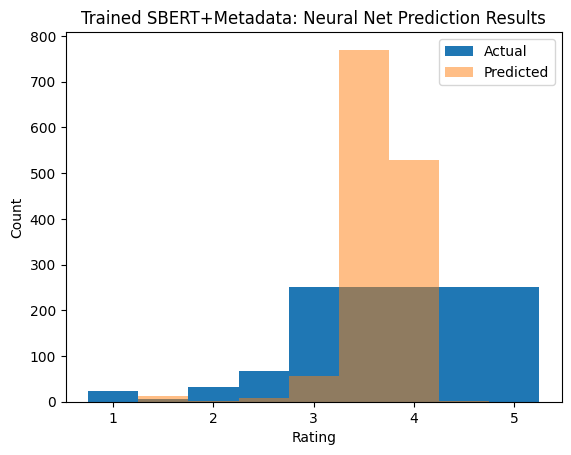

1.0 6.505402078738885

1.5 0.0017909851932184243

2.0 2.6129254538110342

2.5 1.3755897026452286

3.0 0.4893810825460657

3.5 0.10478335535793758

4.0 0.20212438058988874

4.5 0.7725465175549844

5.0 1.7960067405211486



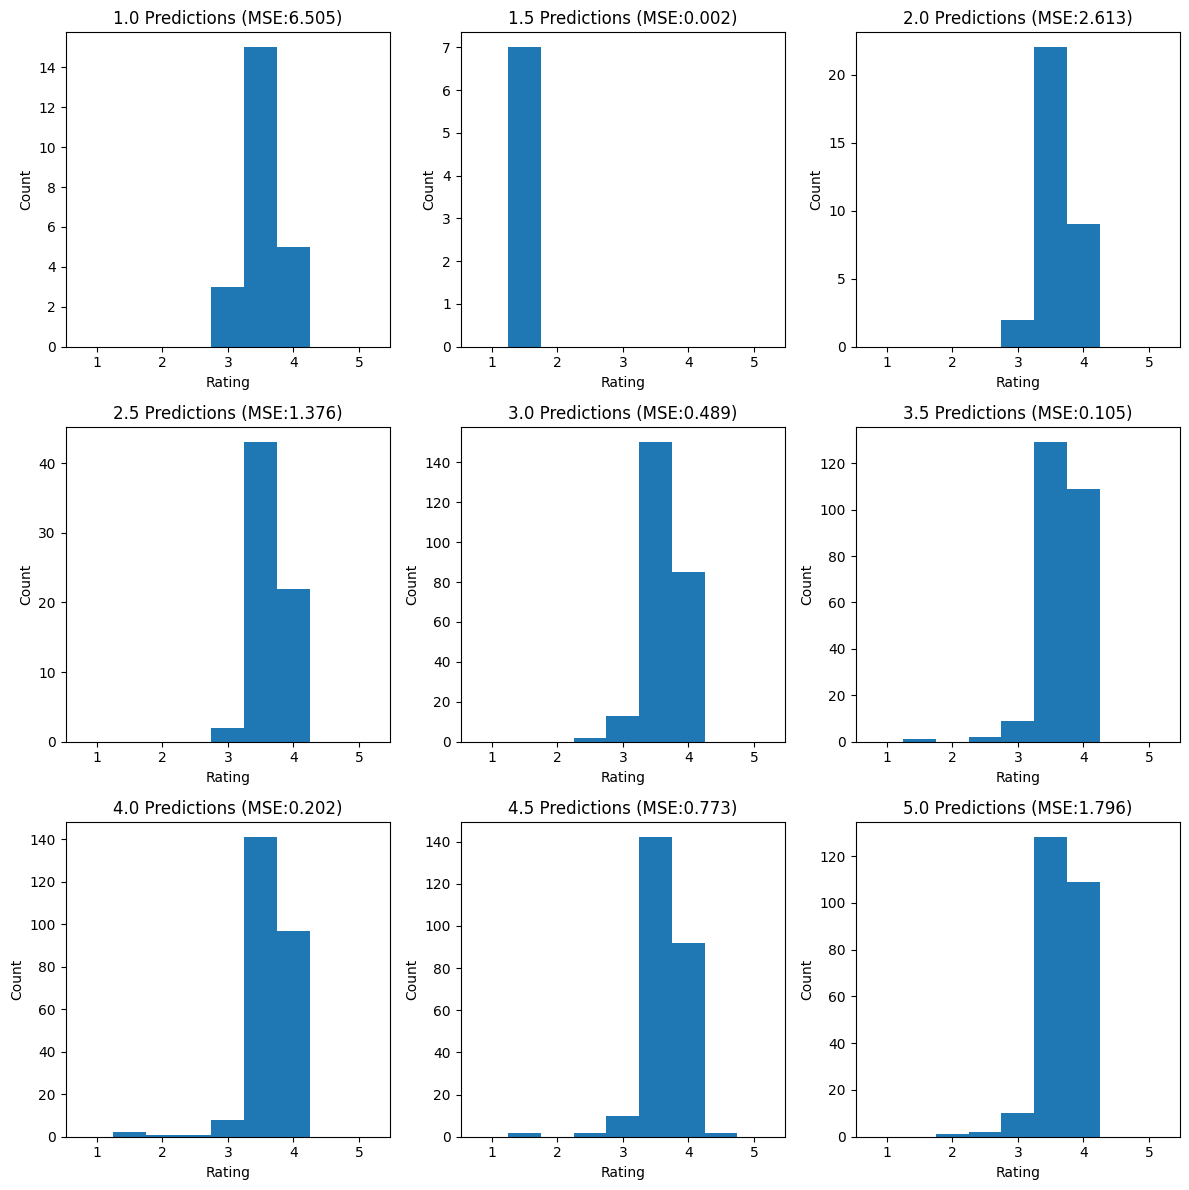

In [120]:
predictions = model.predict([X_test[..., 10:], X_test[..., :10]])
print("Test MSE:", mean_squared_error(y_test, predictions))

result_hist(y_test, predictions, title="Trained SBERT+Metadata: Neural Net Prediction Results", more=True)

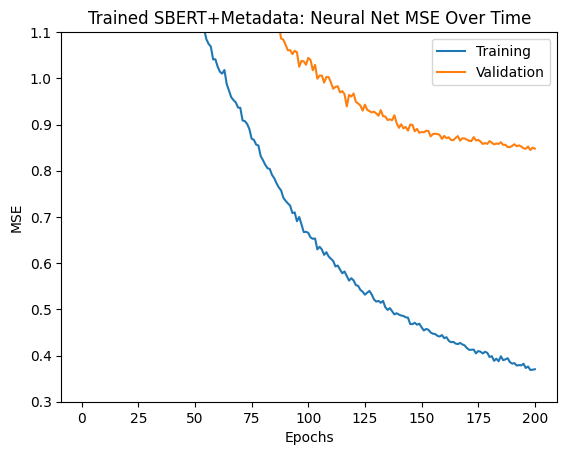

In [119]:
plot_hist(history, ylim=[0.3, 1.1], label="Trained SBERT+Metadata: ")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1.0 6.827036512361879
[3.2717059 3.8818498 3.8031337 ... 3.9229784 3.768728  3.7521687]

1.5 0.0018267885759947994
[3.2717059 3.8818498 3.8031337 ... 3.9229784 3.768728  3.7521687]

2.0 3.2186654353748168
[3.2717059 3.8818498 3.8031337 ... 3.9229784 3.768728  3.7521687]

2.5 1.5422499170616717
[3.2717059 3.8818498 3.8031337 ... 3.9229784 3.768728  3.7521687]

3.0 0.6378432703485856
[3.2717059 3.8818498 3.8031337 ... 3.9229784 3.768728  3.7521687]

3.5 0.12617233758223598
[3.2717059 3.8818498 3.8031337 ... 3.9229784 3.768728  3.7521687]

4.0 0.18205822515530917
[3.2717059 3.8818498 3.8031337 ... 3.9229784 3.768728  3.7521687]

4.5 0.6476518260779305
[3.2717059 3.8818498 3.8031337 ... 3.9229784 3.768728  3.7521687]

5.0 1.6187477892933804
[3.2717059 3.8818498 3.8031337 ... 3.9229784 3.768728  3.7521687]



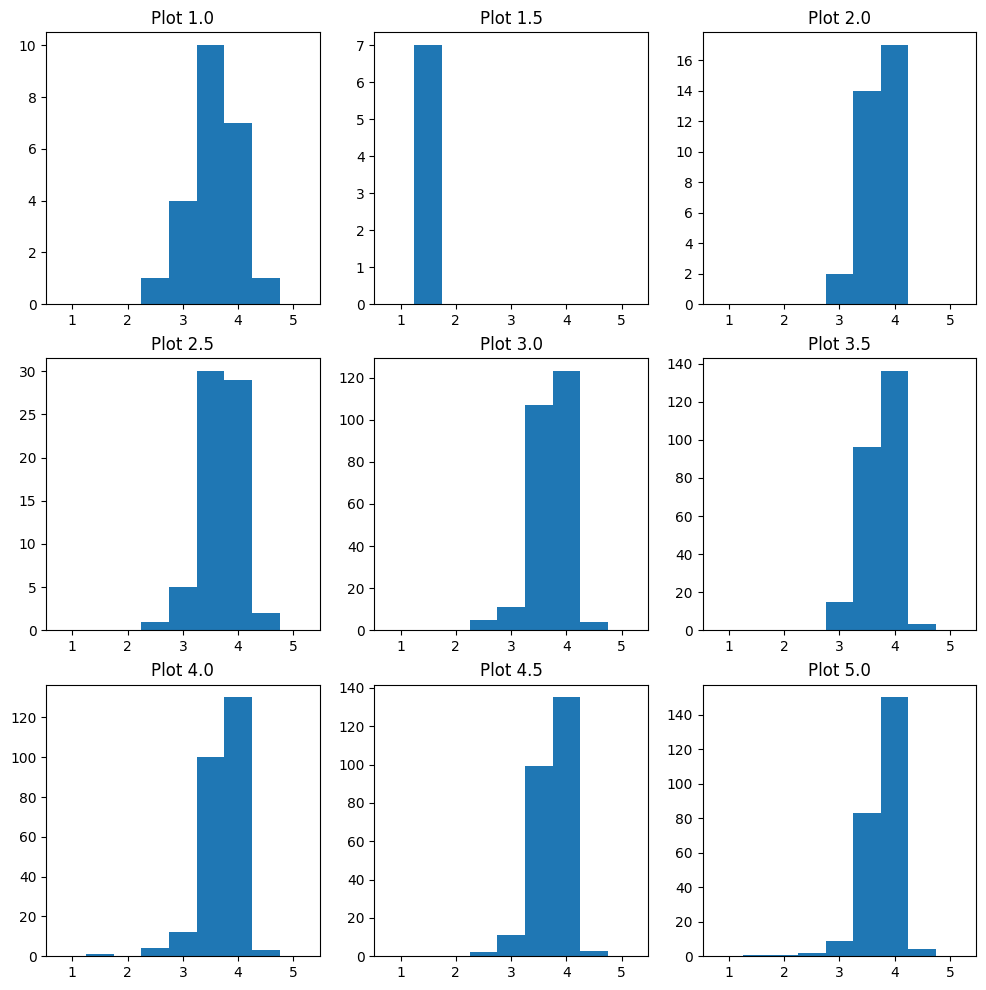

In [340]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
pred = model.predict([X_test[..., 10:], X_test[..., :10]]).reshape(1380)

for i in range(9):
  Rating = i*0.5+1

  print(Rating, mean_squared_error(y_test[y_test==Rating], pred[y_test==Rating]))

  ax = axs[i//3, i%3]
  ax.hist(pred[y_test==Rating], label=str(Rating), bins=[0.75,1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75,5.25])  # Example: vary sine wave
  ax.set_title(f"Plot {Rating}")

  print(pred)
  print()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    if weights:  # Skip non-trainable layers (like activations, Dropout)
        W = weights[0]  # Only the weight matrix, not the bias
        plt.figure(figsize=(10, 4))
        sns.heatmap(W, cmap="coolwarm", center=0)
        plt.title(f"Weights: Layer {i} - {layer.name}")
        plt.xlabel("Next Layer Neurons")
        plt.ylabel("Input Neurons")
        plt.tight_layout()
        plt.show()